# Attack Selfish Mining

## 1) Importation des librairies et creation de fonction 

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Choisir de manière aléatoire A (Attaquant) ou B (le réseau)
def AouB(proba):
    Block=np.random.choice(('A','B'),p=[proba,1-proba])
    return Block

# Simulation Selfish Mining
def Simulation(proba):
    avance=0
    R=0
    H=0
    M=0
    #Etat 0
    Tentative=AouB(proba)
    if Tentative =='B':
        return 0,1,-1
    #Etat 1
    else:
        avance+=1
        R+=1
        H+=1
        M+=1
        Tentative=AouB(proba)
        #Etat 0'
        if Tentative =='B':
            Tentative=AouB(proba)
            if Tentative == 'A':
                return 2,2,2
            else:
                return 0,2,-2
        #Etat 2 et plus  
        else:
            avance+=1
            R+=1
            H+=1
            M+=1
            # l'attaque se poursuit jusqu'à que l'avance vaut 1 
            while avance >=2:
                Tentative=AouB(proba)
                if Tentative =='A':
                    avance+=1
                    R+=1
                    H+=1
                    M+=1
                else:
                    avance-=1
            return R,H,M
        #Return => Reward,Block,nombre de blocks minés(positive => Attaquant ou négative => Réseau)

# Répétition de l'attaque Selfish Mining nombre de fois    
def Résultat(nombre=5,proba=0.33):
    ER=0
    EH=0
    Miner=[]
    for i in range(nombre):
        R,H,M = Simulation(proba)
        Miner.append(M)
        ER+=R
        EH+=H
    return ER,EH,Miner

#https://arxiv.org/pdf/1311.0243.pdf%7C pour la valeur théorique
def Rendement(ER,EH,proba):
    R_exp=ER/EH
    R_theo=(4*proba**2*(1-proba)**2-proba**3)/(1-proba*(1+(2-proba)*proba))
    return R_exp,R_theo

## 2) Seuil de Rentabilité

### a) Paramétrage

In [3]:
#Paramètres
nombre=20000
L_proba=np.arange(0.01,0.5,0.005)
#Values
ER=[]
EH=[]
Miner=[]
#Rendement
L_Rdt_Exp=[]
L_Rdt_Theo=[]

for i in L_proba:
    er,eh,M = Résultat(nombre,i)
    ER.append(er)
    EH.append(eh)
    Miner.append(M)
    R_Exp,R_Theo = Rendement(er,eh,i)
    L_Rdt_Exp.append(R_Exp)
    L_Rdt_Theo.append(R_Theo)

### b) Résultat

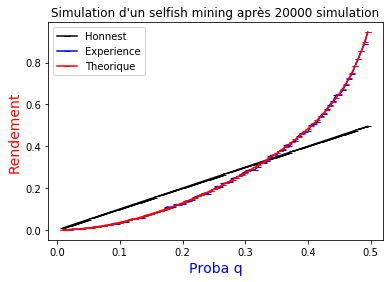

In [4]:
fig,ax=plt.subplots()
plt.title('Simulation d\'un selfish mining après '+str(nombre)+' simulation')
ax.plot(L_proba,L_proba,marker="_",color='black')
ax.plot(L_proba,L_Rdt_Exp,marker="_",color='blue')
ax.plot(L_proba,L_Rdt_Theo,marker="_",color='red')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Rendement",color="red",fontsize=14)
ax.legend(['Honnest','Experience','Theorique'])
idxExp = np.argwhere(np.diff(np.sign(L_proba - L_Rdt_Exp))).flatten() #index intersection Exp
idxTheo = np.argwhere(np.diff(np.sign(L_proba - L_Rdt_Theo))).flatten() #index intersection Theo
plt.show()

In [5]:
print("Valeur min de Rentabilité en théorie =>",L_proba[idxTheo[0]])
print("Valeur min de Rentabilité Expérimentale => ",L_proba[idxExp[0]])

Valeur min de Rentabilité en théorie => 0.32999999999999996
Valeur min de Rentabilité Expérimentale =>  0.33499999999999996


## 3) Avantage

In [6]:
# Répartion du nombre de blocks minés par A et par B (le réseau)
def BlockTeam(M):
    TeamA=0
    TeamB=0
    for i in M:
        if i>0:
            TeamA+=i
        else:
            TeamB+=abs(i)
    return TeamA,TeamB

### a) total de blocks minés entre les 2 parties

In [7]:
TeamA=[]
TeamB=[]
for M in Miner:
    TA,TB = BlockTeam(M)
    TeamA.append(TA)
    TeamB.append(TB)

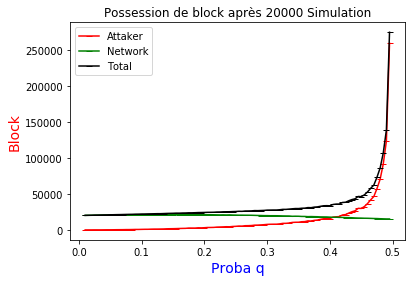

In [8]:
fig,ax=plt.subplots()
plt.title('Possession de block après '+str(nombre)+' Simulation')
ax.plot(L_proba,TeamA,marker="_",color='red')
ax.plot(L_proba,TeamB,marker="_",color='green')
ax.plot(L_proba,EH,marker="_",color='black')
ax.legend(['Attaker','Network','Total'])
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Block",color="red",fontsize=14)

plt.show()

### b) Ratio de blocks minés entre les 2 parties

In [9]:
RatioBlockA=[]
RatioBlockB=[]
for index in range(len(EH)):
    RatioBlockA.append(TeamA[index]/EH[index])
    RatioBlockB.append(TeamB[index]/EH[index])

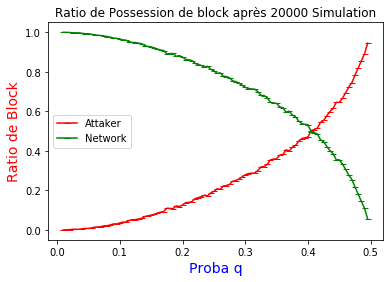

In [10]:
fig,ax=plt.subplots()
plt.title('Ratio de Possession de block après '+str(nombre)+' Simulation')
ax.plot(L_proba,RatioBlockA,marker="_",color='red')
ax.plot(L_proba,RatioBlockB,marker="_",color='green')
ax.legend(['Attaker','Network'])
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Block",color="red",fontsize=14)

plt.show()

### c) Nombres de Reward par block miné en fonction de la puissance 

In [11]:
RewardParSimulationA=[]
for index in range(len(ER)):
    RewardParSimulationA.append(ER[index]/nombre)

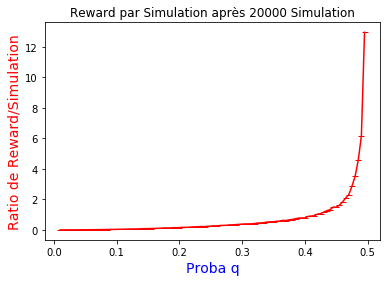

In [12]:
fig,ax=plt.subplots()
plt.title('Reward par Simulation après '+str(nombre)+' Simulation')
ax.plot(L_proba,RewardParSimulationA,marker="_",color='red')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Reward/Simulation",color="red",fontsize=14)

plt.show()

<h1><center>Fin Du TD</center></h1>